# Homework 2
***
**Name**: Dieu My Nguyen
***

This assignment is due on Moodle by **9:30am on Thrusday September 20th**. Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [79]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import math

### [50 points] Problem 1
***

There are two functions that need to be completed:

#### normalization(fname, attr, normType)

- This function takes in the location of the data file, the attribute that has to be normalised (one of the values from 'open','high','low','close','volume') and the type of normalization to be performed ('min_max' or 'z_score')

- Based on the normalisation type that is mentioned, you will have to apply the appropriate formula and return a dictionary where key = original value in the dataset, value = normalised value

#### correlation (fname1, attr1, fname2, attr2)

- This function takes in the location of the first data file, the attribute that has to be used in the first file, the location of the second data file and the attribute that has to be used in the second file.

- This function has to calculate the correlation coefficient between the two attributes mentioned in the two files.

Note:
- Download both the data files and store it in the location "data/dataset_1.csv" and "data/dataset_2.csv" . Please maintain this as it would be necessary while grading.
- Do not change the variable names of the returned values.
- If the test case fails, one way to debug is to see the output of the testing data and comparing it to your output.
- Initially the test case will be failed as there is no code in the below two functions.

In [80]:
def normalization (fname, attr, normType):
    '''
    Input Parameters:
        fname: Name of the csv file containing historical quotes
        attr: The attribute to be normalized 
        normType: The type of normalization 
    Output:
        a dictionary where each key is the original column value and each value is the normalised column value. 
    '''
    
    result = {}
    
    #TODO: Write code given the Input / Output Paramters.
    
    # Read csv into a dataframe
    df = pd.read_csv(fname)
    
    # Calculate normalized values and create dict
    if normType == "min_max":
        for orig_val in df[attr]:
            normalized_val = ((orig_val - df[attr].min())/(df[attr].max() - df[attr].min()))
            normalized_val *= (1.0 - 0) + 0
            result[orig_val] = normalized_val

    elif normType == "z_score":
        mean = df[attr].mean()
        std = df[attr].std()
        for orig_val in df[attr]:
            normalized_val = (orig_val - mean) / std
            result[orig_val] = normalized_val
 
    return result


In [81]:
def correlation (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: name of the first csv file containing historical quotes
        attr1: The attribute to consider in the first csv file (fname1)
        fname2: name of the second csv file containing historical quotes
        attr2: The attribute to consider in the second csv file (fname2)
        
    Output:
        correlation coefficient between attr1 in fname1 and attr2 in fname2
    '''
    
    correlation_coefficient = 0.0
    
    #TODO: Write code given the Input / Output Paramters.
    
    # Read csv's into dataframes
    df1 = pd.read_csv(fname1)
    df2 = pd.read_csv(fname2)
    
    # Get correlation coefficient
    correlation_coefficient = df1[attr1].corr(df2[attr2])
    
    return correlation_coefficient

In [82]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.loc1 = "data/test1.csv"
        self.loc2 = "data/test2.csv"
        file = open('data/testing_normalization', 'rb')
        self.data_normalization = pickle.load(file)
        file.close()
        file = open('data/testing_correlation', 'rb')
        self.data_correlation = pickle.load(file)
        file.close()
        
    def test0(self):
        """
        Test the label counter 
        """
        result = normalization(self.loc2,"open","min_max")
        for key,value in self.data_normalization.items():
            self.assertAlmostEqual(result[key],value, places = 1)
            
    def test1(self):
        """
        Test the label counter 
        """
        result = correlation(self.loc1,"close",self.loc2,"close")
        self.assertAlmostEqual(result,self.data_correlation, places = 1)
   
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.187s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

### [50 points] Problem 2
***

There are 4 functions that need to be completed:

1. For each of the graphs, the input function parameters and the expected output has been mentioned below.

Note:
- Make sure the dataset you are using is the one mentioned in the problem statement in moodle. The link has been provided.
- After defining your functions. Create another block to call these functions by passing the attributes mentioned in moodle.

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [74]:
def temporal_graph(x_data, y_data, xlabel, ylabel, title):
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A temporal graph displayed'''
        
    dates = pd.to_datetime(x_data)
    plt.plot(dates, y_data)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

In [66]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    base_color and median_color can be used to set colors in the graph.
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph.
    
    Output : A boxplot displayed'''
    
    fig = plt.figure()
     
    boxprops = dict(linestyle='-', linewidth=3, color='white')
    medianprops = dict(linestyle='-', linewidth=2.5, color=median_color)
    box = plt.boxplot(y_data, boxprops=boxprops, medianprops=medianprops, notch=True, patch_artist=True)

    for box in box['boxes']:
        box.set(facecolor = base_color)
    
    plt.ylabel(y_label)
    plt.xticks([1, 2], x_label)
    plt.title(title)

    return fig

In [67]:
def histogram(data, x_label, y_label, title):
    '''Input : data is the list containing the data points for histogram buckets
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A histogram displayed'''
    
    fig = plt.figure()
    
    plt.hist(data, bins=10)
    plt.xlabel(x_label), plt.ylabel(y_label)
    plt.title(title)

    return fig

In [68]:
def amzn_new_plot(dataframe, title):
    '''Define this function as you would seem fit to display the plot that interests you using
    the same dataset. Define your function parameters and display the resulting plots'''
    
    fig = plt.figure() 
    
    g = sns.pairplot(df)
    fig = g.fig
    fig.suptitle(title, verticalalignment='top')
    
    return fig

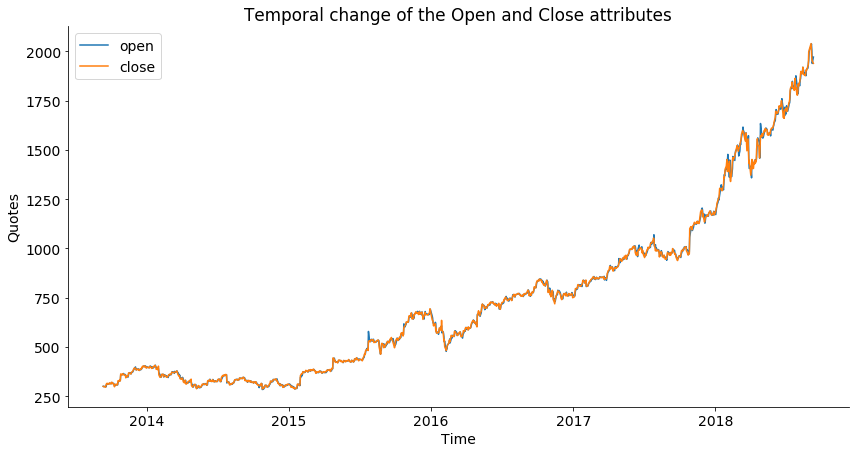

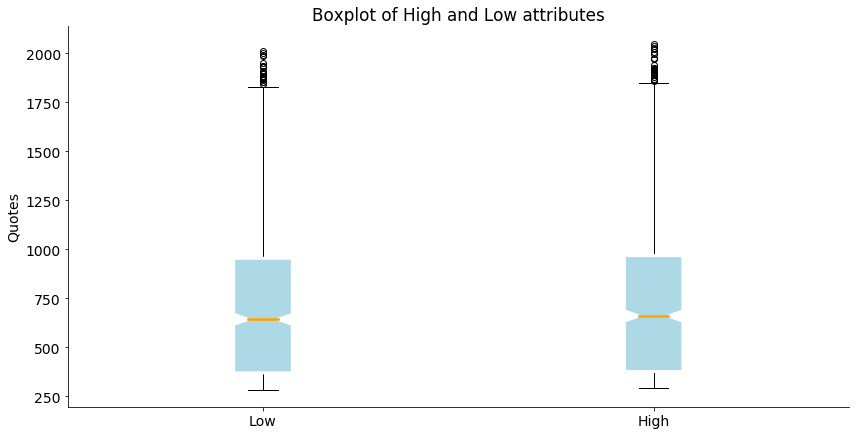

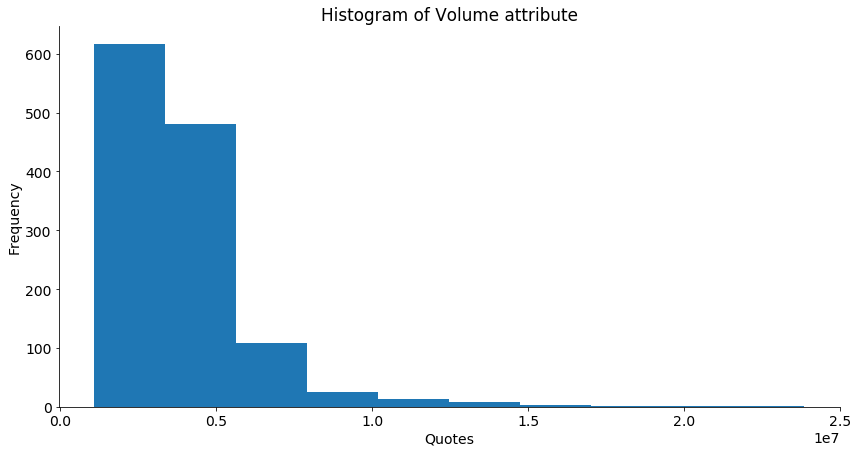

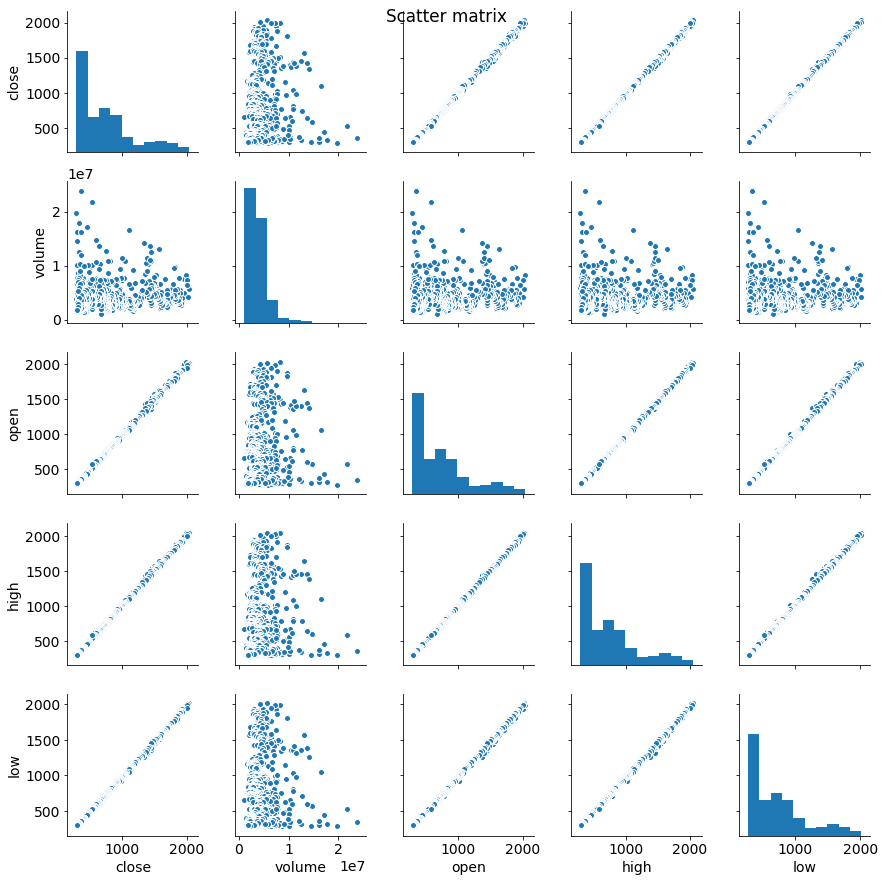

In [78]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('plots.pdf')

# Data as global variable
fname = 'data/AMZN-5Y-HistoricalQuotes.csv'
df = pd.read_csv(fname)

# Call functions to plot

# 1. Temporal graph of Open and Close
temporal_graph(df['date'], df['open'], "Time", "Quotes", "Temporal change of the Open and Close attributes")
temporal_graph(df['date'], df['close'], "Time", "Quotes", "Temporal change of the Open and Close attributes")
plt.savefig('temporal.pdf')
plt.show()

# 2. Boxplot of High and Low
y_data = [df.low, df.high]
x_labels = ['Low', 'High']
plot2 = boxplot(x_labels, y_data, 'lightblue', "orange", x_labels, "Quotes", "Boxplot of High and Low attributes")
plt.show()

# 3. Histogram of Volume
plot3 = histogram(df.volume, "Quotes", "Frequency", "Histogram of Volume attribute")
plt.show()

# 4. Plot of choice
plot4 = amzn_new_plot(df, "Scatter matrix")
plt.show()

# Save figs into pdf
pp.savefig(plot2); pp.savefig(plot3); pp.savefig(plot4)
pp.close()